# Classification Agorithms

## **Loan Eligibility Prediction Model**

### Project Scope:

Loans form an integral part of banking operations. However, not all loans are returned and hence it is important for a bank to closely moniter its loan applications. This case study is an analysis of the German Credit data. It contains details of 614 loan applicants with 13 attributes and the classification whether an applicant was granted loan or denied loan.

**Your role:** Using the available dataset, train a classification model to predict whether an applicant should be given loan.

**Goal:** Build a model to predict loan eligiblity with an average acuracy of more than 76%

**Specifics:** 

* Machine Learning task: Classification model 
* Target variable: Loan_Status 
* Input variables: Refer to data dictionary below
* Success Criteria: Accuracy of 76% and above


## Data Dictionary:

* **Loan_ID:** Applicant ID
* **Gender:** Gender of the applicant Male/Female
* **Married:** Marital status of the applicant
* **Dependents:** Number of dependants the applicant has
* **Education:** Highest level of education
* **Self_Employed:** Whether self-employed Yes/No
* **ApplicantIncome:** Income of the applicant
* **CoapplicantIncome:** Income of the co-applicant
* **LoanAmount:** Loan amount requested
* **Loan_Amount_Term:** Term of the loan
* **Credit_History:** Whether applicant has a credit history
* **Property_Area:** Current property location
* **Loan_Approved:** Loan approved yes/no

## **Data Analysis and Data Prep**

### Loading all the necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Reading the data

In [2]:
# Import the data from 'credit.csv'
df = pd.read_csv('credit.csv')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Approved
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128,360,1,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,1


In [4]:
# check the number of rows and observations
df.shape

(614, 13)

<Axes: xlabel='Loan_Approved', ylabel='count'>

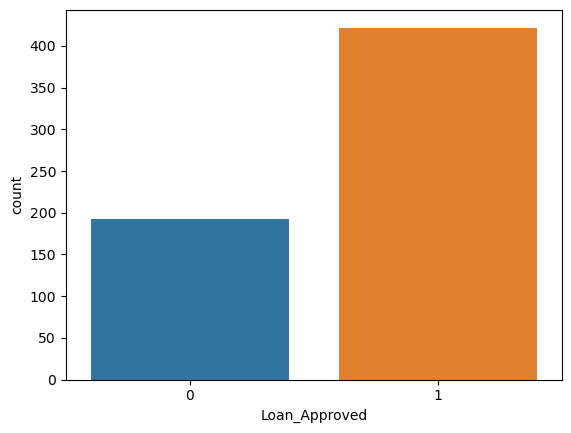

In [5]:
# How many application were approved and how many were denied? Plot a bar plot
sns.countplot(df, x = "Loan_Approved") 

### Data Prep

In [7]:
# drop 'Loan_ID' variable from the data. We won't need it.
df = df.drop("Loan_ID", axis = 1)

In [8]:
# Create dummy variables for all 'object' type variables except 'Loan_Status'
df = pd.get_dummies(df)

In [9]:
# saving this procewssed dataset
df.to_csv('Processed_Credit_Dataset.csv', index=None)

### Data Partition

In [10]:
# Seperate the input features and target variable
y = df.Loan_Approved
x = df.drop('Loan_Approved', axis=1)

In [12]:
# splitting the data in training and testing set
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.20, random_state=1234)

In [13]:
# check the split if interested
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((491, 20), (123, 20), (491,), (123,))

# **Models**

## <font color='chocolate'>**1. Logistic Regression**</font>

In [14]:
# Import Logistic Regression Model
from sklearn.linear_model import LogisticRegression

In [15]:
# Fit the model on the data
lrmodel = LogisticRegression().fit(xtrain, ytrain)

In [17]:
# From sklearn.metrics import accuracy_score and confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

# Predict the loan eligibility on testing set and calculate its accuracy.
ypred = lrmodel.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
accuracy

0.8455284552845529

In [18]:
# Print the confusion matrix
confusion_matrix(ytest, ypred)

array([[22, 17],
       [ 2, 82]], dtype=int64)

In [19]:
# check how probabilities are assigned
pypred = lrmodel.predict_proba(xtest)
pypred


array([[0.30748292, 0.69251708],
       [0.26302547, 0.73697453],
       [0.16957808, 0.83042192],
       [0.34248779, 0.65751221],
       [0.05789127, 0.94210873],
       [0.80878232, 0.19121768],
       [0.48436696, 0.51563304],
       [0.34018741, 0.65981259],
       [0.82983247, 0.17016753],
       [0.22207055, 0.77792945],
       [0.11572551, 0.88427449],
       [0.15363254, 0.84636746],
       [0.29465949, 0.70534051],
       [0.34996682, 0.65003318],
       [0.44472829, 0.55527171],
       [0.36431879, 0.63568121],
       [0.28724763, 0.71275237],
       [0.0223333 , 0.9776667 ],
       [0.27246298, 0.72753702],
       [0.1845042 , 0.8154958 ],
       [0.66855062, 0.33144938],
       [0.2003555 , 0.7996445 ],
       [0.27999119, 0.72000881],
       [0.21275608, 0.78724392],
       [0.28684213, 0.71315787],
       [0.32268936, 0.67731064],
       [0.66088545, 0.33911455],
       [0.05083298, 0.94916702],
       [0.75879923, 0.24120077],
       [0.37200931, 0.62799069],
       [0.

In [20]:
# to change the default threshold and to make it 70% and above
#(pypred[:, 1] >= 0.7).astype(int)

## <font color='chocolate'>**2. Random Forest**

In [21]:
# Import RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier


In [14]:
# Let's list the tunable hyperparameters for Random Forest algorithm


For random forests,

* The first hyperparameter to tune is n_estimators. We will try 100 and 200.

* The second one is max_features. Let's try - 'auto', 'sqrt', and 0.33.

* The third one is min_samples_leaf. Let's try - 1, 3, 5, 10

In [22]:
# Fit a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100).fit(xtrain,ytrain)